<a href="https://colab.research.google.com/github/Onkargaikwad/Onkargaikwad/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["NOT FAILURE", "FAILURE"]

In [53]:
df=pd.read_csv("Maintenance.csv",sep='\t',skipinitialspace=True)

In [54]:
df.shape

(10000, 14)

In [55]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [56]:
df=df.drop(['UDI','Product ID'],axis=1)

In [57]:
df1=pd.get_dummies(df['Type'])

In [58]:
df1.drop(['M'],axis=1).head(5)

,H,L
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [59]:
df=pd.concat([df,df1],axis=1)

In [60]:
df.nunique()

Type                         3
Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Machine failure              2
TWF                          2
HDF                          2
PWF                          2
OSF                          2
RNF                          2
H                            2
L                            2
M                            2
dtype: int64

Text(0, 0.5, 'Frequency')

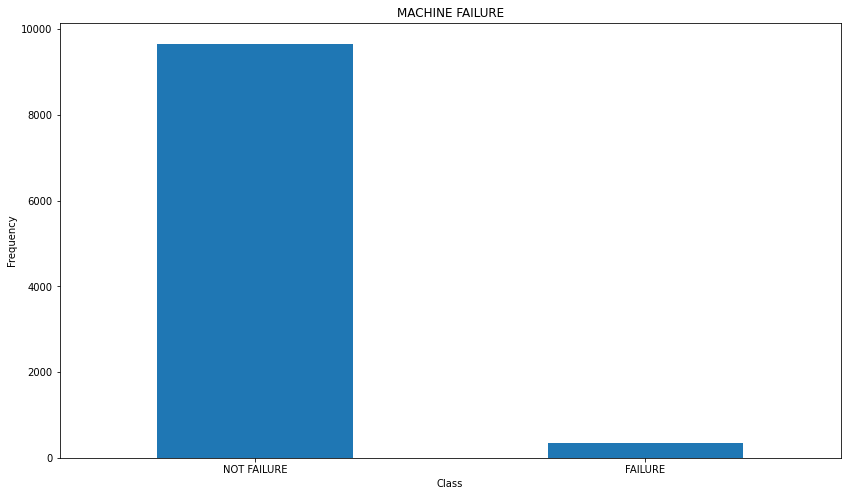

In [61]:
count_classes = pd.value_counts(df['Machine failure'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("MACHINE FAILURE")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")



In [62]:
ailure = df[df['Machine failure']==1]

notfailure = df[df['Machine failure']==0]

In [63]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
H                          0
L                          0
M                          0
dtype: int64

In [64]:
df.duplicated().sum()

0

In [65]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [66]:
####handling imbalanced data 
!pip install imblearn

In [67]:
from imblearn.over_sampling import SMOTE
X=df[['Air temperature [K]',	'Process temperature [K]'	,'Rotational speed [rpm]',	'Torque [Nm]'	,'Tool wear [min]']]
Y=df[['Machine failure']]

In [68]:
# Implementing Oversampling for Handling Imbalanced 
oversample = SMOTE()
x,y = oversample.fit_resample(X, Y)

In [69]:
x.shape,y.shape

((19322, 5), (19322, 1))

Text(0.5, 1.0, 'Machine failure')

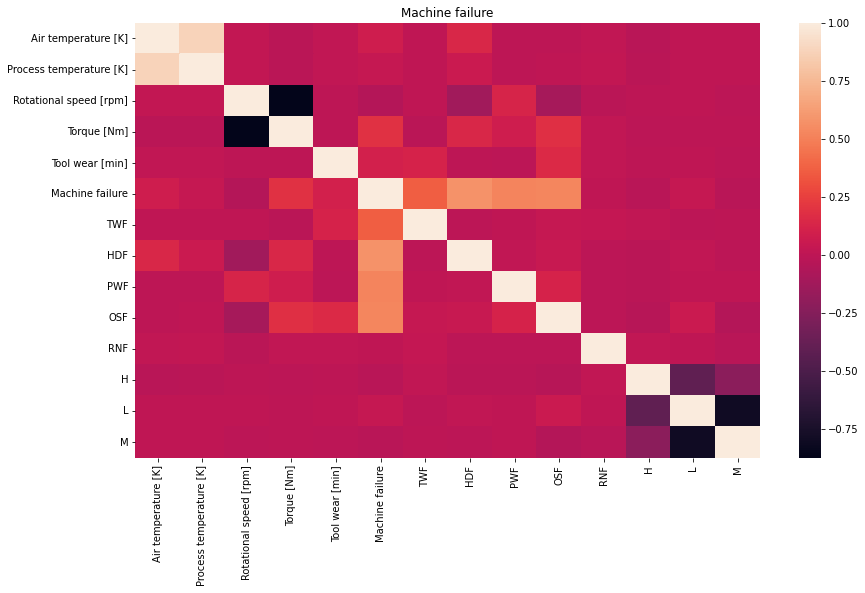

In [70]:
correlation=df.corr()
sns.heatmap(df.corr(),)
plt.title('Machine failure') 

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [73]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((13525, 5), (5797, 5), (13525, 1), (5797, 1))

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
classification_report(y_test,y_pred)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2340,  525],
       [ 530, 2402]])

In [79]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC
#Create a svm Classifier
clf = svm.SVC(kernel='poly')
#Train the model using the training sets
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.893048128342246


In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','rbf']} 

In [82]:
grid = GridSearchCV( SVC(),param_grid, refit = True, verbose = 3,n_jobs=-1)

In [86]:
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [88]:
print(grid.best_params_) 
grid_predictions = grid.predict(x_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2865
           1       0.94      0.97      0.95      2932

    accuracy                           0.95      5797
   macro avg       0.95      0.95      0.95      5797
weighted avg       0.95      0.95      0.95      5797

